In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pulp

import sys
sys.path.insert(0, '../..')
import bottleneck_assignment
import leximin_assignment

from tqdm import tqdm
import time

from math import isclose
import warnings

In [2]:
cost_matrix = np.random.uniform(size=(5, 5))
cost_matrix

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443]])

In [3]:
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV2(
    cost_matrix, np.ones((10,))
)

# leximin_assigner = leximin_assignment.LeximinAssignmentHelperV2(
#     np.round(cost_matrix, 5), np.ones((10,))
# )

assignments = leximin_assigner.solve(verbose=True)
assignments

Number of agents assigned: 0 / 5
Current leximin: 1
Number of agents assigned: 1 / 5
Current leximin: 0.5448831829968969
Number of agents assigned: 2 / 5
Current leximin: 0.46147936225293185
Number of agents assigned: 3 / 5
Current leximin: 0.4375872112626925
Number of agents assigned: 4 / 5
Current leximin: 0.08712929970154071


array([3, 1, 4, 0, 2])

In [4]:
e = 1e-2

cost_matrix = np.array([
    [0, 1 - 2 * e, 1 - e, 1],
    [0, 1 - 2 * e, 1, 1],
    [0, 0, 1 - 2 * e, 1],
    [0, 0, 0, 1 - e]
])
capacities = [1, 1, 1, 1]

cost_matrix

array([[0.  , 0.98, 0.99, 1.  ],
       [0.  , 0.98, 1.  , 1.  ],
       [0.  , 0.  , 0.98, 1.  ],
       [0.  , 0.  , 0.  , 0.99]])

In [5]:
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV2(
    cost_matrix, np.ones((4,))
)

assignments = leximin_assigner.solve(verbose=True)
assignments

Number of agents assigned: 0 / 4
Current leximin: 1
Number of agents assigned: 1 / 4
Current leximin: 0.99
Number of agents assigned: 2 / 4
Current leximin: 0.98
Reusing current leximin
Number of agents assigned: 3 / 4
Current leximin: 0.98


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


array([0, 1, 2, 3])

In [7]:
e = 1e-2

cost_matrix = np.array([
    [0, 1, 1, 1],
    [0, 1 - e, 1, 1],
    [0, 0, 1 - e, 1],
    [0, 0, 0, 1 - e]
])
capacities = [1, 1, 1, 1]

leximin_assigner = leximin_assignment.LeximinAssignmentHelperV2(
    cost_matrix, np.ones((4,))
)

assignments = leximin_assigner.solve(verbose=True)
assignments

Number of agents assigned: 0 / 4
Current leximin: 1
Number of agents assigned: 1 / 4
Current leximin: 0.99
Reusing current leximin
Number of agents assigned: 2 / 4
Current leximin: 0.99
Reusing current leximin
Number of agents assigned: 3 / 4
Current leximin: 0.99


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')
/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


array([0, 1, 2, 3])

In [6]:
bottleneck_assigner = bottleneck_assignment.BottleneckAssignmentHelperV2(
    cost_matrix, np.ones((4,))
)

thresholds, assignments = bottleneck_assigner.solve()
assignments

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')
/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


array([2, 0, 1, 3])

In [8]:
N = 20
N_EXPERIMENTS = 100

times1 = []
times2 = []

for _ in tqdm(range(N_EXPERIMENTS)):
    try:
        # cost_matrix = np.round(np.random.uniform(size=(N, N)), 5)
        cost_matrix = np.random.uniform(size=(N, N))

        assigner = leximin_assignment.LeximinAssignmentHelper(
            cost_matrix, np.ones((N,))
        )
        with warnings.catch_warnings():  # temporarily suspense warnings
            warnings.simplefilter('ignore')
            t0 = time.time()
            assignments1 = assigner.solve()
        times1.append(time.time() - t0)

        assigner = leximin_assignment.LeximinAssignmentHelperV2(
            cost_matrix, np.ones((N,))
        )
        with warnings.catch_warnings():  # temporarily suspense warnings
            warnings.simplefilter('ignore')
            t0 = time.time()
            assignments2 = assigner.solve()
        times2.append(time.time() - t0)

        if not np.array_equal(assignments1, assignments2):
            print(cost_matrix)
            print(assignments1)
            print(assignments2)
            break
    
    except TypeError:
        print(cost_matrix)
        break

100%|██████████| 100/100 [05:49<00:00,  3.49s/it]


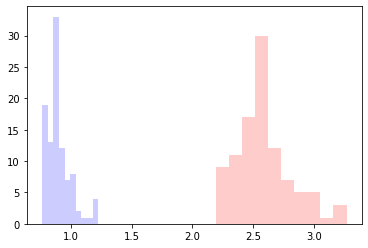

In [9]:
plt.hist(times1, color='r', alpha=0.2)
plt.hist(times2, color='b', alpha=0.2)

plt.show()